<a href="https://colab.research.google.com/github/ferhatemrekoc/MachineLearningProject-LifeExpextancyDataset/blob/main/LifeExpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objs as go 
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [ ]:
life_exp_path="/content/Life Expectancy Data.csv"
df=pd.read_csv(life_exp_path)

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
pip install pycountry-convert

     |████████████████████████████████| 10.1 MB 5.4 MB/s 
     |████████████████████████████████| 296 kB 49.2 MB/s 
     |████████████████████████████████| 207 kB 50.9 MB/s 
     |████████████████████████████████| 296 kB 16.2 MB/s 
     |████████████████████████████████| 280 kB 44.4 MB/s 
     |████████████████████████████████| 280 kB 51.6 MB/s 
     |████████████████████████████████| 280 kB 54.1 MB/s 
     |████████████████████████████████| 280 kB 45.0 MB/s 
     |████████████████████████████████| 279 kB 60.8 MB/s 
     |████████████████████████████████| 279 kB 40.5 MB/s 
     |████████████████████████████████| 272 kB 37.3 MB/s 
     |████████████████████████████████| 272 kB 57.0 MB/s 
     |████████████████████████████████| 272 kB 14.7 MB/s 
     |████████████████████████████████| 270 kB 38.3 MB/s 
     |████████████████████████████████| 270 kB 54.0 MB/s 
     |████████████████████████████████| 270 kB 45.8 MB/s 
     |████████████████████████████████| 248 kB 48.8 MB/s 
     |████████

In [ ]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_continent)
def get_code(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code)

In [ ]:
lst=[]
for country in df.Country:
  lst.append(get_continent(country))
lst1=[]
for country in df.Country:
  lst1.append(get_code(country))

In [ ]:
df['Continent']=lst
df['CountryCode']=lst1

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent,CountryCode
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,AS,AF
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,AS,AF
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,AS,AF
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,AS,AF
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,AS,AF


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df[(df.Continent=='Unknown')]['Country'].unique()
df[(df.CountryCode=='Unknown')]['Country'].unique()

array([], dtype=object)

In [ ]:
df.replace("Venezuela (Bolivarian Republic of)", "Venezuela", inplace=True)
df.replace("The former Yugoslav republic of Macedonia",  "Macedonia",  inplace=True)
df.replace("Bolivia (Plurinational State of)",  "Bolivia",  inplace=True)
df.replace("Iran (Islamic Republic of)",  "Iran",  inplace=True)
df.replace("Micronesia (Federated States of)",  "Micronesia",  inplace=True)
df.replace("Republic of Korea",  "South Korea",  inplace=True)

In [1]:
df.loc[df['Country'] == 'Timor-Leste', 'Continent'] = 'AS'

NameError: ignored

In [ ]:
df[(df.Country=='Timor-Leste')]['Continent']

2601    AS
2602    AS
2603    AS
2604    AS
2605    AS
2606    AS
2607    AS
2608    AS
2609    AS
2610    AS
2611    AS
2612    AS
2613    AS
2614    AS
2615    AS
2616    AS
Name: Continent, dtype: object

In [ ]:
df.Continent.unique()

array(['AS', 'EU', 'AF', 'NA', 'SA', 'OC'], dtype=object)

***FILLING NULL VALUES***

In [ ]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Continent                            0
CountryCode                          0
dtype: int64

In [ ]:
df[df['Life expectancy '].isnull() == True]['Country']

624              Cook Islands
769                  Dominica
1650         Marshall Islands
1715                   Monaco
1812                    Nauru
1909                     Niue
1958                    Palau
2167    Saint Kitts and Nevis
2216               San Marino
2713                   Tuvalu
Name: Country, dtype: object

In [ ]:
# correncting the names of the columns
df.columns = ['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population',
       'thinness_1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling','Continent','CountryCode']

In [ ]:
# filling the life expectancy and adult mortality with the mean values as it has a very less number of missing values 
# and not realted with the countries
df["life_expectancy"] = df["life_expectancy"].fillna(value = df["life_expectancy"].mean())
df["adult_mortality"] = df["adult_mortality"].fillna(value = df["adult_mortality"].mean())

In [ ]:
df[df['alcohol'].isnull() == True]['country'].nunique()

178

In [ ]:
#since missing values in the alcohol column are not related with the countries, again we will fill them with mean.
df["alcohol"] = df["alcohol"].fillna(value = df["alcohol"].mean())

In [ ]:
df[df['hepatitis_b'].isnull() == True]['country'].nunique()

98

In [ ]:
df['hepatitis_b'] = df['hepatitis_b'].fillna(df.groupby('Continent')['hepatitis_b'].transform('mean'))

In [ ]:
df['population'] = df['population'].fillna(df.groupby('Continent')['population'].transform('mean'))
df['bmi'] = df['bmi'].fillna(df.groupby('Continent')['bmi'].transform('mean'))
df['polio'] = df['hepatitis_b'].fillna(df.groupby('Continent')['polio'].transform('mean'))
df['total_expenditure'] = df['total_expenditure'].fillna(df.groupby('Continent')['total_expenditure'].transform('mean'))
df['diphtheria'] = df['diphtheria'].fillna(df.groupby('Continent')['diphtheria'].transform('mean'))
df['gdp'] = df['gdp'].fillna(df.groupby('Continent')['gdp'].transform('mean'))
df['thinness_1-19_years'] = df['thinness_1-19_years'].fillna(df.groupby('Continent')['thinness_1-19_years'].transform('mean'))
df['thinness_5-9_years'] = df['thinness_5-9_years'].fillna(df.groupby('Continent')['thinness_5-9_years'].transform('mean'))
df['income_composition_of_resources'] = df['income_composition_of_resources'].fillna(df.groupby('Continent')['income_composition_of_resources'].transform('mean'))
df['schooling'] = df['schooling'].fillna(df.groupby('Continent')['schooling'].transform('mean'))

In [ ]:
df.isna().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
Continent                          0
CountryCode                        0
dtype: int64

- Detecting Outliers For Each Variable

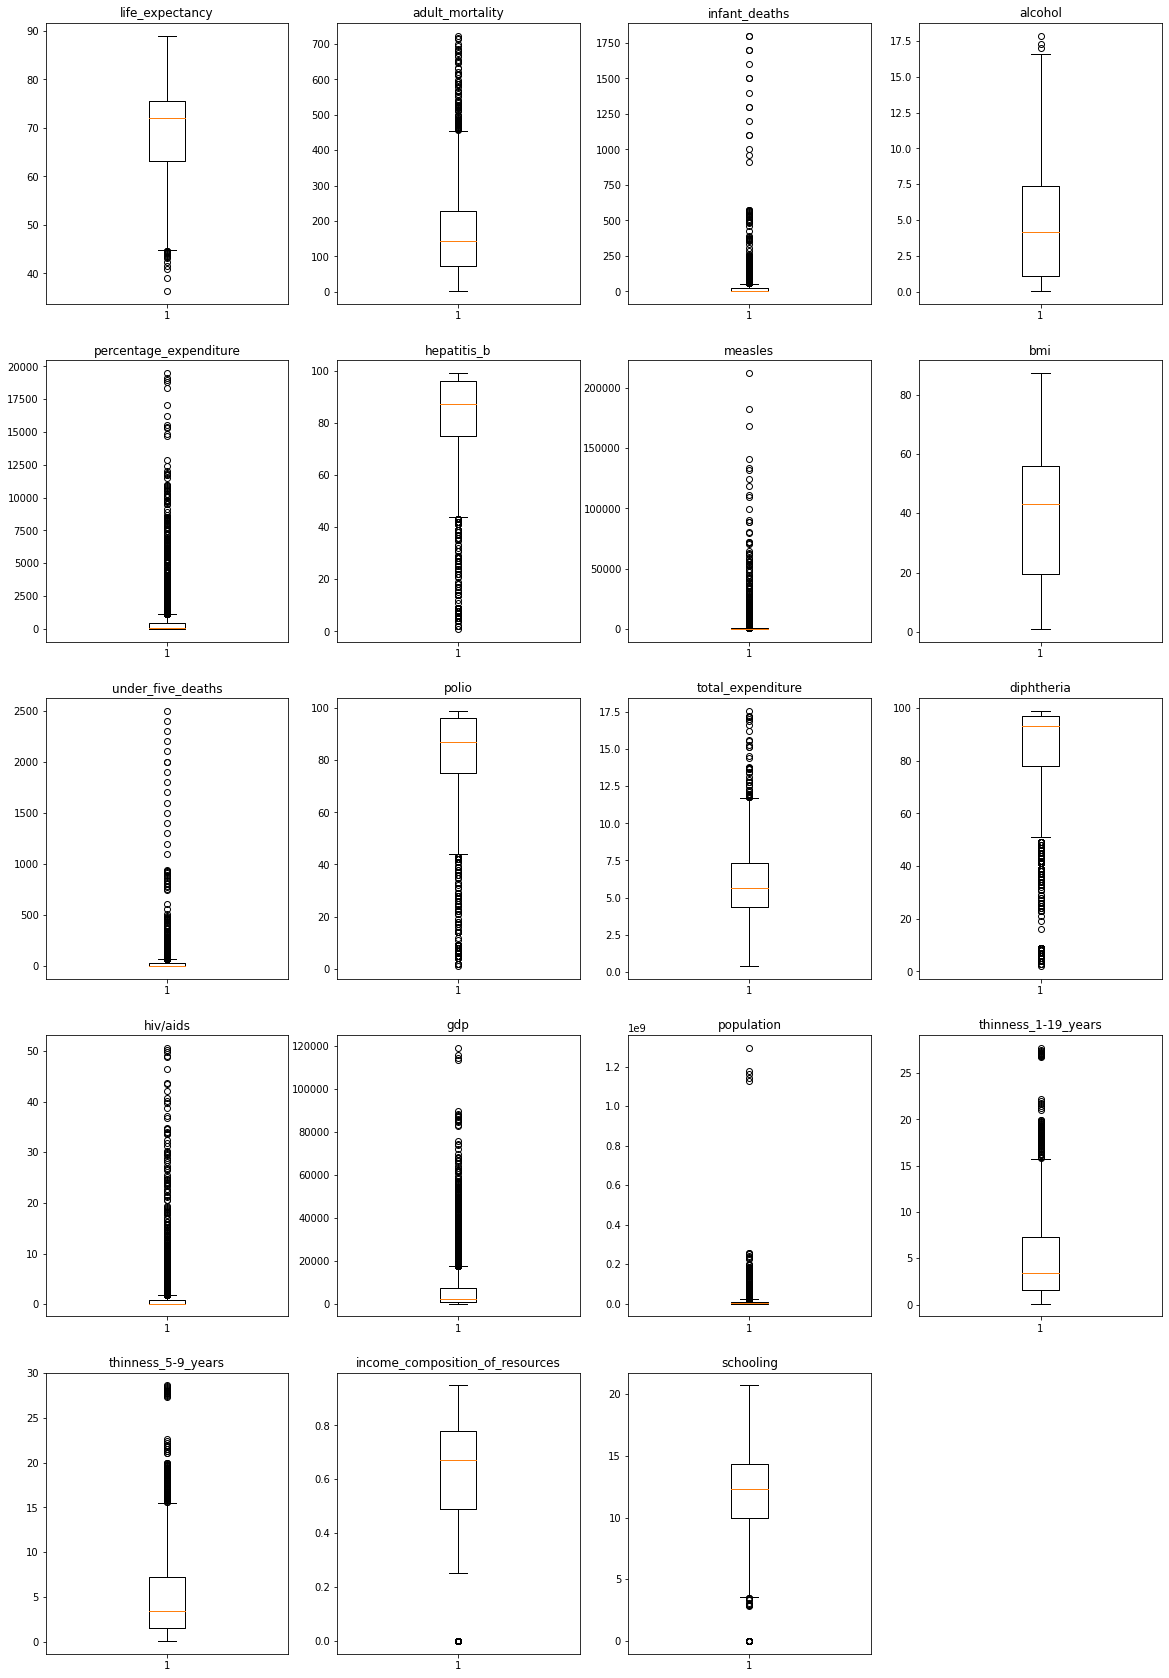

In [ ]:
# Create a dictionary of columns.
col_dict = {'life_expectancy':1,'adult_mortality':2,'infant_deaths':3,'alcohol':4,'percentage_expenditure':5,'hepatitis_b':6,
            'measles':7,'bmi':8,'under_five_deaths':9,'polio':10,'total_expenditure':11,'diphtheria':12,'hiv/aids':13,
            'gdp':14,'population':15,'thinness_1-19_years':16,'thinness_5-9_years':17,'income_composition_of_resources':18,'schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [ ]:
# Calculating number of outliers in each variable using Tukey's method.

for variable in col_dict.keys():
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers of it in {} : {} ".format(variable, len((np.where((df[variable] > max_val)
     | (df[variable] < min_val))[0]))))

Number of outliers of it in life_expectancy : 17 
Number of outliers of it in adult_mortality : 86 
Number of outliers of it in infant_deaths : 315 
Number of outliers of it in alcohol : 3 
Number of outliers of it in percentage_expenditure : 389 
Number of outliers of it in hepatitis_b : 238 
Number of outliers of it in measles : 542 
Number of outliers of it in bmi : 0 
Number of outliers of it in under_five_deaths : 394 
Number of outliers of it in polio : 238 
Number of outliers of it in total_expenditure : 51 
Number of outliers of it in diphtheria : 298 
Number of outliers of it in hiv/aids : 542 
Number of outliers of it in gdp : 383 
Number of outliers of it in population : 483 
Number of outliers of it in thinness_1-19_years : 83 
Number of outliers of it in thinness_5-9_years : 99 
Number of outliers of it in income_composition_of_resources : 130 
Number of outliers of it in schooling : 40 


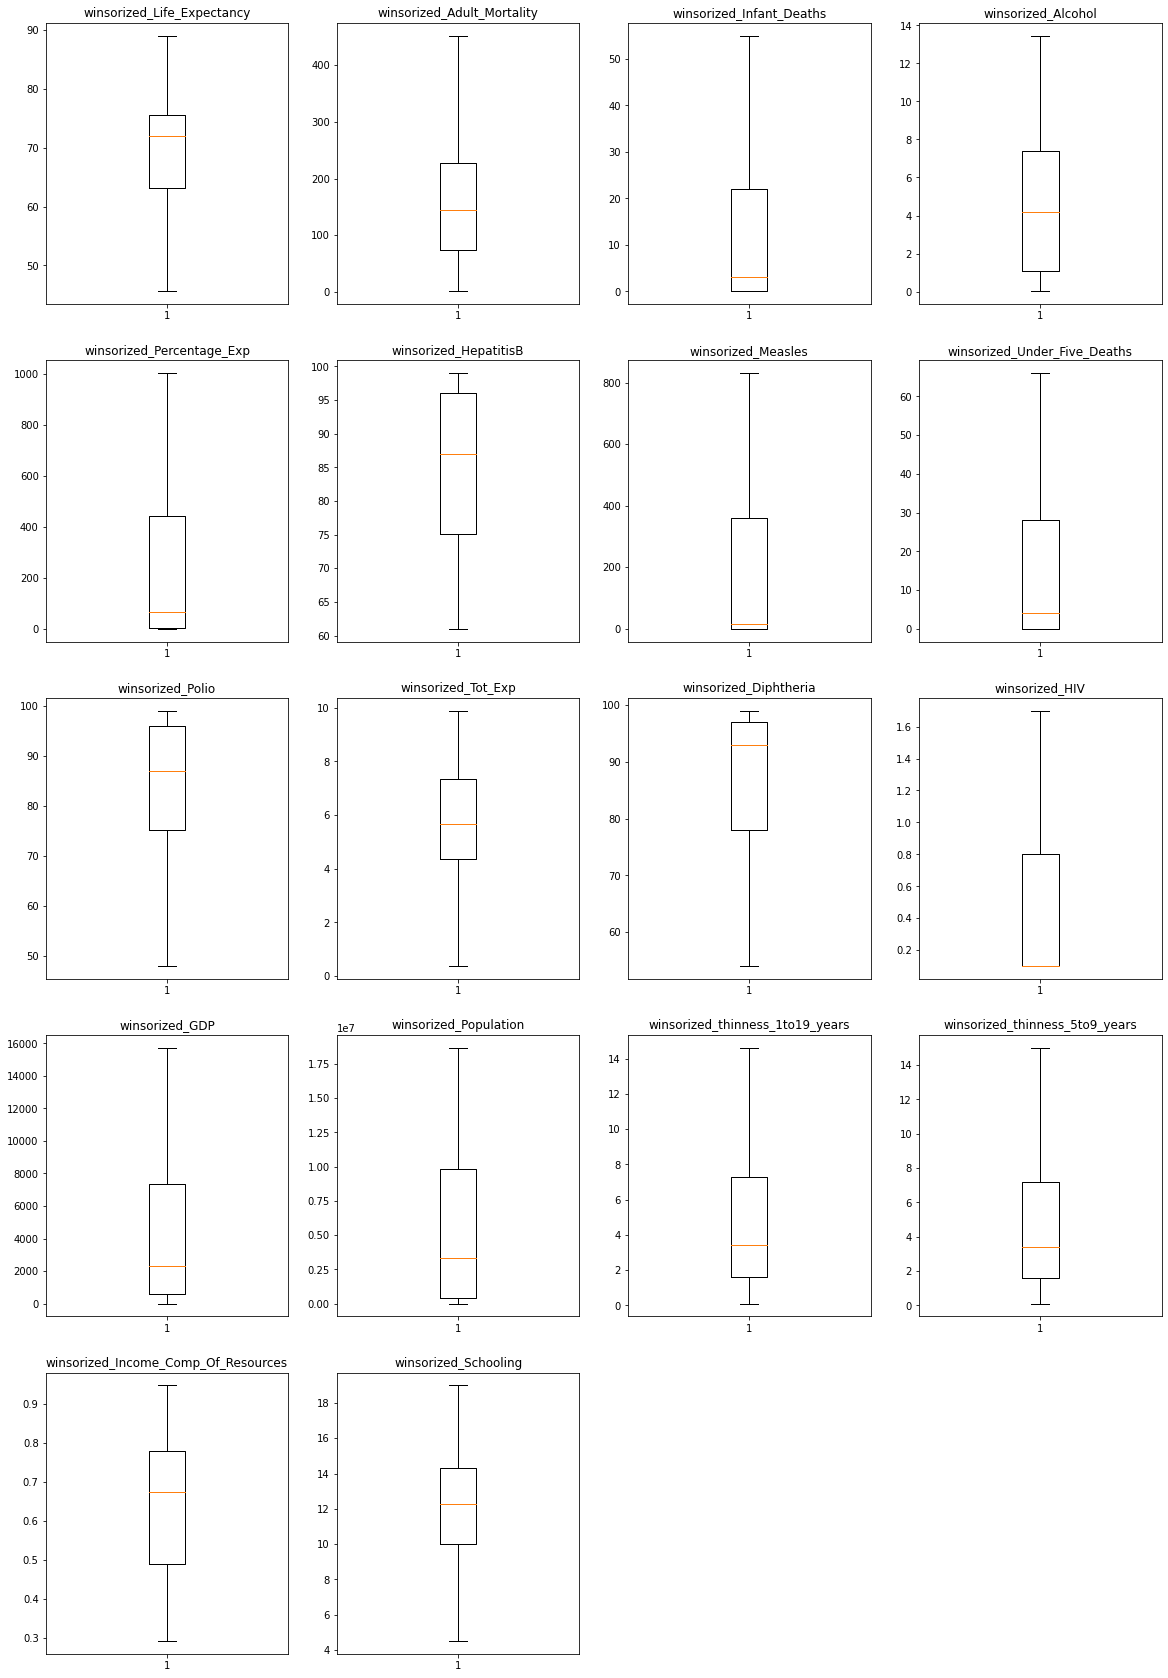

In [ ]:
from scipy.stats.mstats import winsorize

plt.figure(figsize=(20,30))

plt.subplot(5,4,1)
winsorized_Life_Expectancy = winsorize(df['life_expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.subplot(5,4,2)
winsorized_Adult_Mortality = winsorize(df['adult_mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.subplot(5,4,3)
winsorized_Infant_Deaths = winsorize(df['infant_deaths'],(0,0.11))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.subplot(5,4,4)
winsorized_Alcohol = winsorize(df['alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.subplot(5,4,5)
winsorized_Percentage_Exp = winsorize(df['percentage_expenditure'],(0,0.14))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.subplot(5,4,6)
winsorized_HepatitisB = winsorize(df['hepatitis_b'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.subplot(5,4,7)
winsorized_Measles = winsorize(df['measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.subplot(5,4,8)
winsorized_Under_Five_Deaths = winsorize(df['under_five_deaths'],(0,0.14))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.subplot(5,4,9)
winsorized_Polio = winsorize(df['polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.subplot(5,4,10)
winsorized_Tot_Exp = winsorize(df['total_expenditure'],(0,0.04))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.subplot(5,4,11)
winsorized_Diphtheria = winsorize(df['diphtheria'],(0.11,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.subplot(5,4,12)
winsorized_HIV = winsorize(df['hiv/aids'],(0,0.19))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.subplot(5,4,13)
winsorized_GDP = winsorize(df['gdp'],(0,0.14))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.subplot(5,4,14)
winsorized_Population = winsorize(df['population'],(0,0.18))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.subplot(5,4,15)
winsorized_thinness_1to19_years = winsorize(df['thinness_1-19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.subplot(5,4,16)
winsorized_thinness_5to9_years = winsorize(df['thinness_5-9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.subplot(5,4,17)
winsorized_Income_Comp_Of_Resources = winsorize(df['income_composition_of_resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.subplot(5,4,18)
winsorized_Schooling = winsorize(df['schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [ ]:
df['life_expectancy'] = winsorized_Life_Expectancy
df['adult_mortality'] = winsorized_Adult_Mortality
df['infant_deaths'] = winsorized_Infant_Deaths
df['alcohol'] = winsorized_Alcohol
df['percentage_expenditure'] = winsorized_Percentage_Exp
df['hepatitis_b'] = winsorized_HepatitisB
df['under_five_deaths'] = winsorized_Under_Five_Deaths
df['polio'] = winsorized_Polio
df['total_expenditure'] = winsorized_Tot_Exp
df['diphtheria'] = winsorized_Diphtheria
df['hiv/aids'] = winsorized_HIV
df['gdp'] = winsorized_GDP
df['population'] = winsorized_Population
df['thinness_1-19_years'] = winsorized_thinness_1to19_years
df['thinness_5-9_years'] = winsorized_thinness_5to9_years
df['income_composition_of_resources'] = winsorized_Income_Comp_Of_Resources
df['schooling'] = winsorized_Schooling
df['measles'] = winsorized_Measles

In [ ]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,Continent,CountryCode
0,Afghanistan,2015,Developing,65.0,263.0,55,0.01,71.279624,65.0,831,19.1,66,65.0,8.16,65.0,0.1,584.259210,1.866346e+07,14.6,15.0,0.479,10.1,AS,AF
1,Afghanistan,2014,Developing,59.9,271.0,55,0.01,73.523582,62.0,492,18.6,66,62.0,8.18,62.0,0.1,612.696514,3.275820e+05,14.6,15.0,0.476,10.0,AS,AF
2,Afghanistan,2013,Developing,59.9,268.0,55,0.01,73.219243,64.0,430,18.1,66,64.0,8.13,64.0,0.1,631.744976,1.866346e+07,14.6,15.0,0.470,9.9,AS,AF
3,Afghanistan,2012,Developing,59.5,272.0,55,0.01,78.184215,67.0,831,17.6,66,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,14.6,15.0,0.463,9.8,AS,AF
4,Afghanistan,2011,Developing,59.2,275.0,55,0.01,7.097109,68.0,831,17.2,66,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,14.6,15.0,0.454,9.5,AS,AF


- Data Visualition

In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world_life_expectancy = world.merge(df, left_on="name", right_on="country")

world_life_expectancy.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,Continent,CountryCode
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2015,Developing,69.9,188.0,0,4.602861,0.000000,99.0,0,62.7,0,99.0,6.585321,99.0,0.1,4921.896290,892149.0,4.0,3.7,0.734,15.3,OC,FJ
1,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2014,Developing,69.7,19.0,0,0.010000,50.539484,99.0,0,61.9,0,99.0,4.490000,99.0,0.1,546.372800,88586.0,4.0,3.7,0.727,15.2,OC,FJ
2,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2013,Developing,69.6,192.0,0,0.010000,460.648780,99.0,0,61.1,0,99.0,4.260000,99.0,0.1,4763.689560,879715.0,4.0,3.7,0.719,15.0,OC,FJ
3,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2012,Developing,69.4,195.0,0,0.010000,431.485487,99.0,0,6.2,0,99.0,4.160000,99.0,0.1,4546.738540,873596.0,4.0,3.7,0.714,14.9,OC,FJ
4,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2011,Developing,69.2,197.0,0,0.010000,401.793104,99.0,0,59.5,0,99.0,4.600000,99.0,0.1,4353.121392,86786.0,4.0,3.7,0.709,14.7,OC,FJ


In [ ]:
pip install geoplot

     |████████████████████████████████| 10.8 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 36.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 35.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.4 MB/s 
     |████████████████████████████████| 219 kB 79.0 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516313 sha256=f74b3015bd059b13e7df494bfad8e7f084d4ad4cb3933124d9379c712879748b
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=f135852e244af633a26bdc0ee7f4945558d630c23

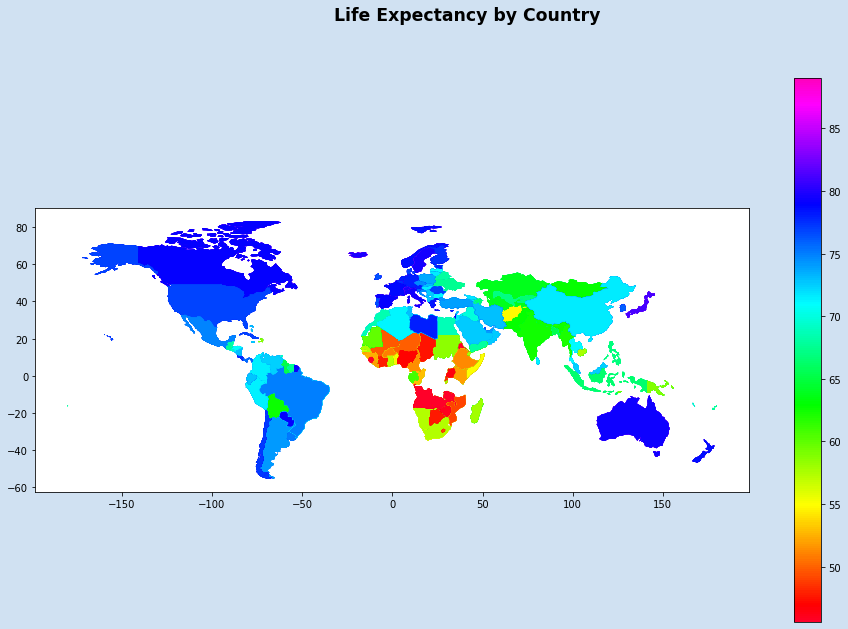

In [ ]:
fig, ax = plt.subplots(figsize = (16,10),facecolor = plt.cm.Blues(.2))
fig.suptitle('Life Expectancy by Country',
             fontsize = 'xx-large',  
             fontweight = 'bold')

ax = world_life_expectancy.plot(
    column = 'life_expectancy',
    cmap = 'gist_rainbow',
    ax = ax,
    legend = True)

plt.show()

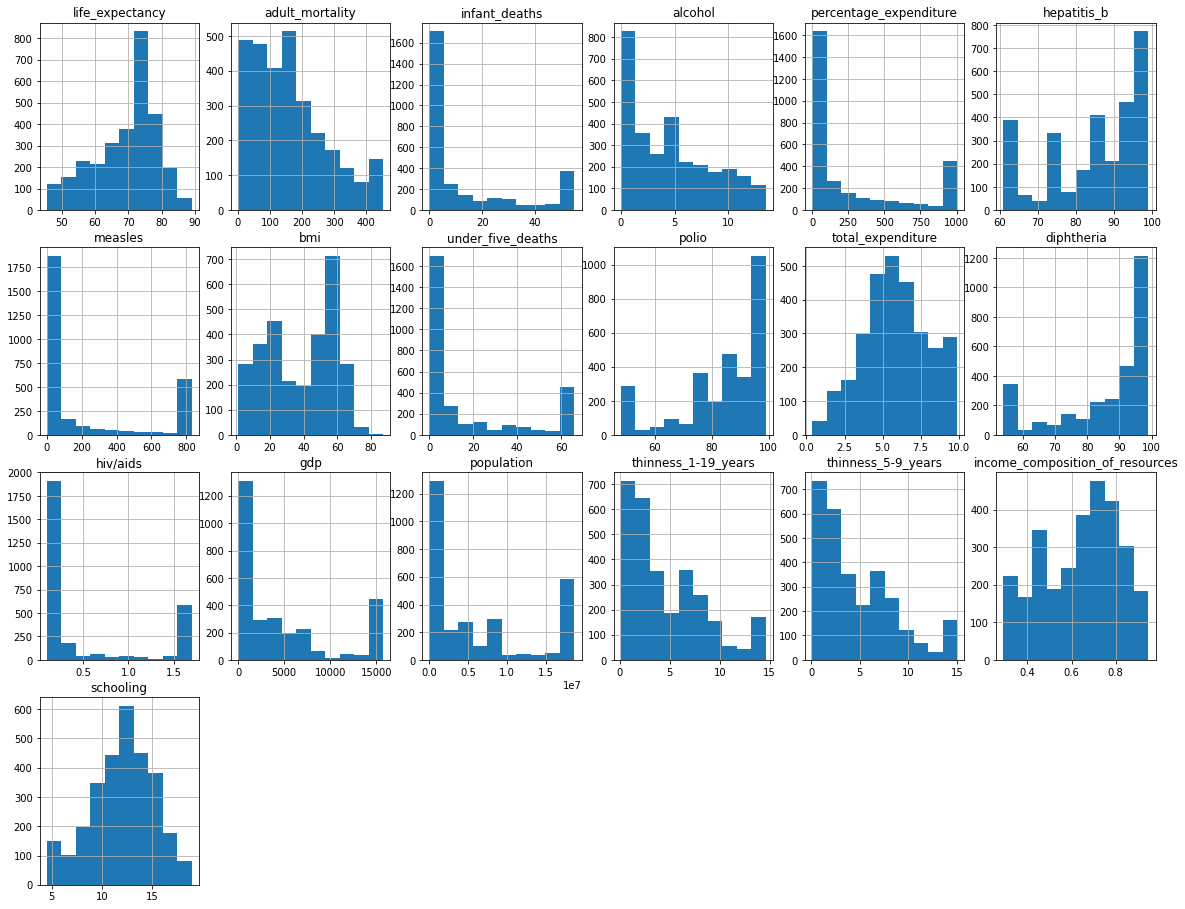

In [ ]:
fig = plt.figure(figsize=(20,20))
for variable,i in col_dict.items():
                     plt.subplot(5,6,i)
                     plt.hist(df[variable])
                     plt.title(variable)
                     plt.ylabel('')
                     
                     plt.grid(True)
    
plt.show()

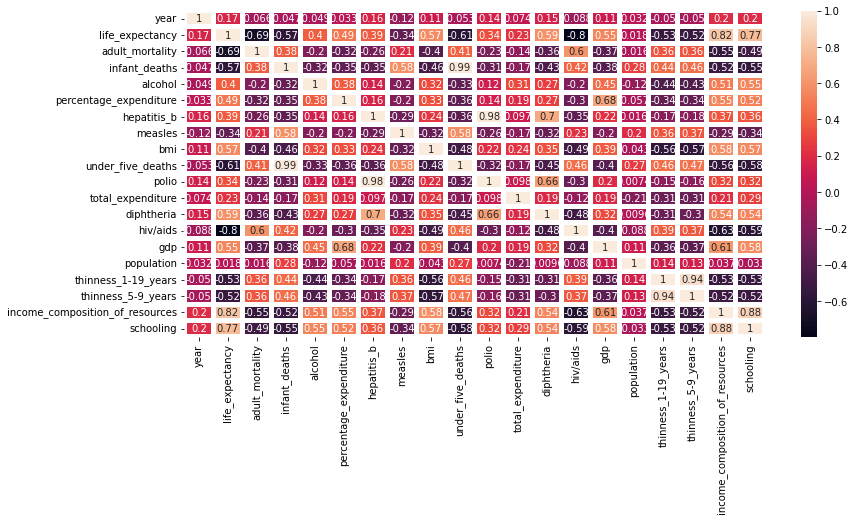

In [ ]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot =True, linewidths = 4)

As seen from the heat map, life expectancy has a positive relationship with resource income composition, education, diphtheria, polio, GDP, and percentage spending. Life expectancy has a negative relationship with adult_mortality, under_five_deaths, thinness_1-19_years, thinness_5-9_years, hiv/aids, and infant_deaths.

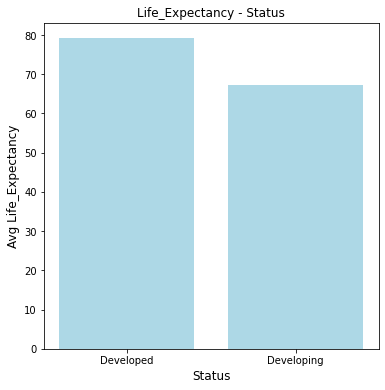

In [ ]:
plt.figure(figsize=(6,6))
plt.bar(df.groupby('status')['status'].count().index,df.groupby('status')['life_expectancy'].mean(),
        color='lightblue')
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy - Status")
plt.show()

From the above, developed countries have higher average Life_Expectancy compared to Developing.
Let us find out statistically if this difference is significant.

In [ ]:
# Finding the significance of difference of Average_Life_Expectancy between Developed and Developing countries using 
# t-test
import scipy.stats as stats
stats.ttest_ind(df.loc[df['status']=='Developed','life_expectancy'],df.loc[df['status']=='Developing','life_expectancy'])

Ttest_indResult(statistic=29.92843570495017, pvalue=5.351096937412755e-172)

p value is < 0.05
Hence, the difference of Average_Life_Expectancy between Developed and Developing countries is significant. We can consider 'Status' as a feature as it is related to Life Expectancy.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
life_expectancy,2938.0,6.924195e+01,9.461423e+00,45.60000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
adult_mortality,2938.0,1.618914e+02,1.151473e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,4.520000e+02
infant_deaths,2938.0,1.363513e+01,1.910893e+01,0.00000,0.000000,3.000000e+00,2.200000e+01,5.500000e+01
alcohol,2938.0,4.589454e+00,3.881767e+00,0.01000,1.092500,4.160000e+00,7.390000e+00,1.345000e+01
percentage_expenditure,2938.0,2.712345e+02,3.631723e+02,0.00000,4.685343,6.491291e+01,4.415341e+02,1.002833e+03
hepatitis_b,2938.0,8.484692e+01,1.241935e+01,61.00000,75.101587,8.700000e+01,9.600000e+01,9.900000e+01
measles,2938.0,2.206913e+02,3.291923e+02,0.00000,0.000000,1.700000e+01,3.602500e+02,8.310000e+02
bmi,2938.0,3.816609e+01,1.999327e+01,1.00000,19.400000,4.300000e+01,5.610000e+01,8.730000e+01
under_five_deaths,2938.0,1.741797e+01,2.407526e+01,0.00000,0.000000,4.000000e+00,2.800000e+01,6.600000e+01


In [ ]:
df = pd.get_dummies(df,columns=['status'])
df = pd.get_dummies(df,columns=["country"])

- Now we will drop the continent and countrycode columns beacuse they are categroical.

In [ ]:
df = df.drop('Continent',axis=1)
df = df.drop('CountryCode',axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

x = df.drop(["life_expectancy"] , axis = 1)
y = df["life_expectancy"]
y = np.array(y).reshape(-1,1)


scaler_x = MinMaxScaler(feature_range = (0,1))
scaled_x = scaler_x.fit_transform(x)
scaled_x = pd.DataFrame(columns = x.columns , data = scaled_x)

In [ ]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

x_train.shape , x_test.shape , y_train.shape , y_test.shape

((2350, 214), (588, 214), (2350, 1), (588, 1))

- Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(x_train, y_train) #fit an OLS model

LinearRegression()

In [ ]:
y_preds_train = lrm.predict(x_train)
y_preds_test = lrm.predict(x_test)  #making predictions

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import (RandomForestRegressor)
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing
from sklearn.svm import SVR
import xgboost
import lightgbm as lgb
from xgboost import XGBRegressor

In [ ]:
print("R-squared of the model in training set is: {}".format(lrm.score(x_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(x_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.9600196607344793
-----Test set statistics-----
R-squared of the model in test set is: 0.958756451685283
Mean absolute error of the prediction is: 1.2521447868363167
Mean squared error of the prediction is: [3.55687736]
Root mean squared error of the prediction is: [1.88596855]
Mean absolute percentage error of the prediction is: 1.8631555897152516


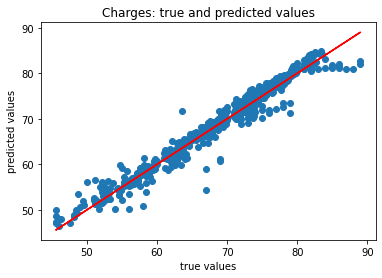

In [ ]:
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

- Ridge Regression

In [ ]:
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(x_train, y_train)

ridge = ridgeregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
y_preds_train = ridge.predict(x_train)
y_preds_test_ridge = ridge.predict(x_test)

print("R-squared of the model in training set is: {}".format(ridge.score(x_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(x_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_ridge)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_ridge)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_ridge) / y_test)) * 100))

R-squared of the model in training set is: 0.9600151458940489
-----Test set statistics-----
R-squared of the model in test set is: 0.9587276159053331
Mean absolute error of the prediction is: 1.2535174362575987
Mean squared error of the prediction is: [3.55936418]
Root mean squared error of the prediction is: [1.88662773]
Mean absolute percentage error of the prediction is: 1.8654871183119803


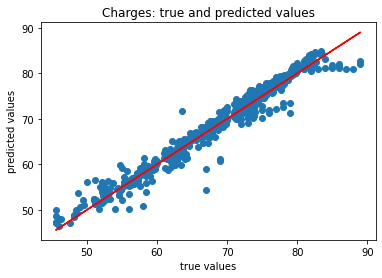

In [ ]:
plt.scatter(y_test, y_preds_test_ridge)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

- Random Forest

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred_random = regressor.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

print("R-squared of the model in training set is: {}".format(regressor.score(x_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(regressor.score(x_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(MSE(y_test, y_pred_random)**(1/2)))

R-squared of the model in training set is: 0.9946965322164208
-----Test set statistics-----
R-squared of the model in test set is: 0.9692194042163375
Root mean squared error of the prediction is: 1.6292770696703363


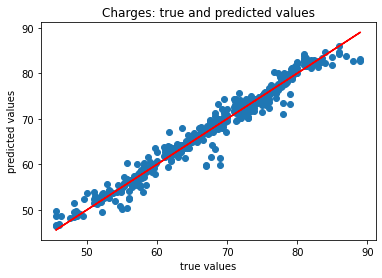

In [ ]:
plt.scatter(y_test, y_pred_random)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [ ]:
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing
from sklearn.svm import SVR
import xgboost
import lightgbm as lgb
from xgboost import XGBRegressor

- Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

ka_reg = DecisionTreeRegressor(max_depth=4)

ka_reg.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error as MSE
y_pred_dcs = ka_reg.predict(x_test)
mse_ka = MSE(y_pred_dcs, y_test)
rmse_ka = mse_ka**(1/2)

print("R-squared of the model in training set is: {}".format(ka_reg.score(x_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ka_reg.score(x_test, y_test)))
print("Root mean squared error of the prediction is : {:.2f}".format(rmse_ka))

R-squared of the model in training set is: 0.8774666669754451
-----Test set statistics-----
R-squared of the model in test set is: 0.8584583344999787
Root mean squared error of the prediction is : 3.49


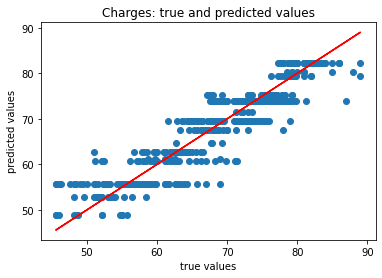

In [ ]:
plt.scatter(y_test, y_pred_dcs)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

- XGBoost

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)
xg_reg.fit(x_train,y_train)
y_pred_xg = xg_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xg))
print("R-squared of the model in training set is: {}".format(xg_reg.score(x_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(xg_reg.score(x_test, y_test)))
print("Root mean squared error of the prediction is: %f" % (rmse))

R-squared of the model in training set is: 0.9528987517550772
-----Test set statistics-----
R-squared of the model in test set is: 0.9433639983779107
Root mean squared error of the prediction is: 2.210053


In [ ]:
DM_train = xgb.DMatrix(data = x_train, label=y_train)
DM_test =  xgb.DMatrix(data = x_test, label=y_test)
params = {"booster":"gblinear", "objective":"reg:squarederror"}
xg_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

In [ ]:
y_pred_gblinear = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gblinear))
print("Root mean squared error of the prediction is: %f" % (rmse))

Root mean squared error of the prediction is: 3.459361


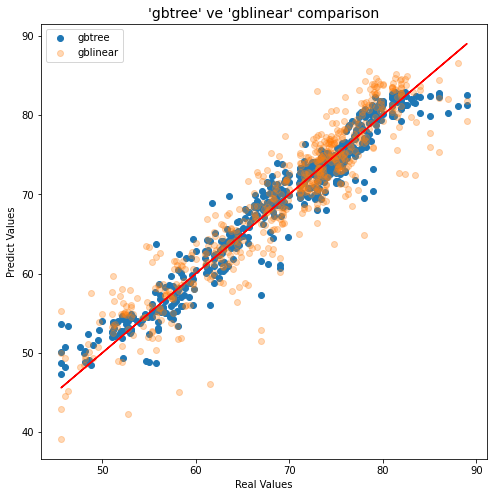

In [ ]:
plt.figure(figsize=(8,8))
plt.title("'gbtree' ve 'gblinear' comparison", size = 14)
ax1 = plt.scatter(y_test, y_pred_xg)
ax2 = plt.scatter(y_test, y_pred_gblinear, alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('gbtree', 'gblinear'))
plt.xlabel("Real Values")
plt.ylabel("Predict Values")
plt.show()

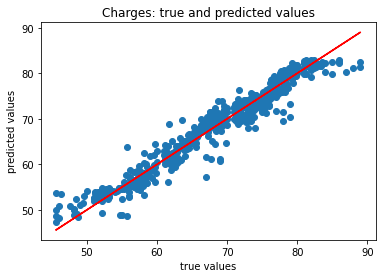

In [ ]:
plt.scatter(y_test, y_pred_xg)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()